In [46]:
import numpy as np
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 25
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis = 1)

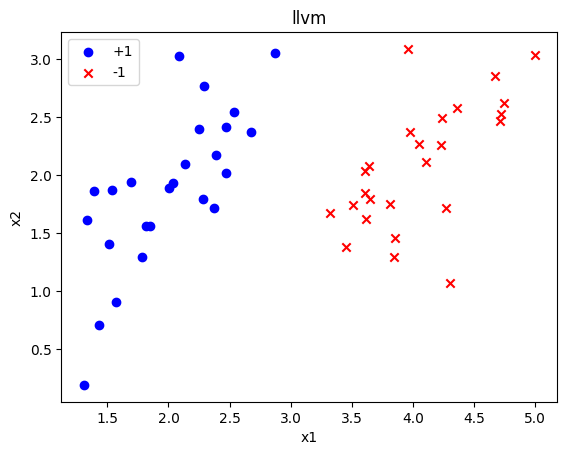

In [37]:
import matplotlib.pyplot as plt

plt.scatter(X[0, :N], X[1, :N], marker='o', color='b', label='+1')
plt.scatter(X[0, N:], X[1, N:], marker='x', color='r', label='-1')
plt.legend()
plt.title('llvm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [47]:
X_features = X.T
y_labels = y.flatten()

In [ ]:
def svm(X: np.ndarray[np.float64], y: np.ndarray[np.float64], lr=0.001, λ=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0

    for _ in range(epochs):
        for idx in n_samples:
            x_i, y_i = X[idx], y[idx]

            margin = y_i * (np.dot(w, x_i) + b)
            if margin >= 1:
                w -= lr * (2 * λ * w)
            else:
                w -= lr * (2 * λ * w - y_i * x_i)
                b += lr * y_i
    return w, b

w, b = svm(X_features, y_labels)
w, b

(array([-1.70504861,  0.73313408]), np.float64(3.64099999999971))

In [49]:
y_fn = X_features @ w + b
y_pred = np.sign(y_fn)
accuracy = np.mean(y_pred == y_labels)
print(f"Training accuracy: {accuracy:.3f}")

Training accuracy: 1.000


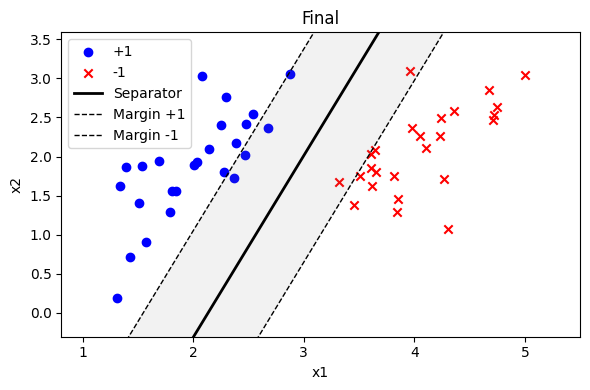

In [50]:
x_min, x_max = X_features[:, 0].min() - 0.5, X_features[:, 0].max() + 0.5
x_values = np.linspace(x_min, x_max, 200)

decision_boundary = -(w[0] * x_values + b) / w[1]
margin_positive = -(w[0] * x_values + b - 1) / w[1]
margin_negative = -(w[0] * x_values + b + 1) / w[1]

plt.figure(figsize=(6, 4))
plt.scatter(X[0, :N], X[1, :N], marker='o', color='b', label='+1')
plt.scatter(X[0, N:], X[1, N:], marker='x', color='r', label='-1')
plt.plot(x_values, decision_boundary, color='k', linewidth=2, label='Separator')
plt.plot(x_values, margin_positive, color='k', linestyle='--', linewidth=1, label='Margin +1')
plt.plot(x_values, margin_negative, color='k', linestyle='--', linewidth=1, label='Margin -1')
plt.fill_between(x_values, margin_negative, margin_positive, color='grey', alpha=0.1)
plt.xlim(x_min, x_max)
plt.ylim(X_features[:, 1].min() - 0.5, X_features[:, 1].max() + 0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Final')
plt.legend()
plt.tight_layout()
plt.show()